In [276]:
import torch
import math
import numpy as np

from torch import optim
import torch.distributions.normal as normal
from scipy import stats

import matplotlib.pyplot as plt


In [284]:
def normal_pdf(x, mu, sigma):
    return torch.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

In [285]:
MU = 1
SIGMA = 8
SKEW = -1

data_size = 40_000
randx = stats.skewnorm.rvs(SKEW, MU, SIGMA, data_size)
x = torch.tensor(randx)

y = torch.tensor(np.random.uniform(-10, 10, 1), requires_grad=True)
z = torch.tensor(np.random.uniform(15, 30, 1), requires_grad=True)
# s = torch.randn(1, requires_grad=True)
s = torch.tensor(np.random.uniform(-10, 10), requires_grad=True)  # skewness
print(y, z, s)

tensor([-5.6828], dtype=torch.float64, requires_grad=True) tensor([17.8257], dtype=torch.float64, requires_grad=True) tensor(0.2989, requires_grad=True)


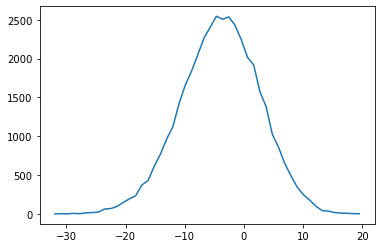

In [286]:
%matplotlib inline
plt.figure()
h, edges = np.histogram(x, bins=50)
plt.plot(edges[:-1], h)

In [287]:
optimizer = optim.Adam([y, z, s], lr=0.01)

In [293]:
norm = normal.Normal(0, 1)
epochs = 10
batch_size = 100
for epoch in range(epochs):
    for i in range(0, data_size - batch_size, batch_size):
        # print(dist.cdf(s * (x - y) / abs(z)))
        optimizer.zero_grad()
        batch = x[i:i + batch_size]
        loss = -torch.mean((-(x - y)**2 / (2 * z**2)) - z.log() + norm.cdf(s * (x - y) / abs(z)).log())
        loss.backward()
        optimizer.step()
        
    print("loss:", float(loss))
    print("est mean:", float(y), "est sigma", float(z), "est skew:", float(s))
        

print("actual mean:", sum(x)/len(x))
print("actual sigma:", math.sqrt(sum((x-sum(x)/len(x))**2)/len(x)))

loss: 3.234259039052995
est mean: -15.739599131868141 est sigma 14.813711658118253 est skew: 3.9662129878997803
loss: 3.1206068290230236
est mean: -11.675215860714697 est sigma 10.712499625757044 est skew: 2.0706348419189453
loss: 3.093840249795566
est mean: -9.53535311360806 est sigma 9.011656917505439 est skew: 1.3614718914031982
loss: 3.0864524161479827
est mean: -8.278094296765119 est sigma 8.18343040402257 est skew: 1.015661358833313
loss: 3.0837502091517033
est mean: -7.428291554646405 est sigma 7.704651405012356 est skew: 0.8067106604576111
loss: 3.0825317707146613
est mean: -6.792491836009553 est sigma 7.394472590890082 est skew: 0.6615428328514099
loss: 3.081902903520434
est mean: -6.28470762301386 est sigma 7.179209515236783 est skew: 0.5514827370643616
loss: 3.081550206708963
est mean: -5.862615644874111 est sigma 7.023910216916791 est skew: 0.4633903503417969
loss: 3.081342663716595
est mean: -5.503628597860839 est sigma 6.909722232941062 est skew: 0.3905276358127594
loss: 

In [289]:
loss = -torch.mean(normal_pdf(x, y, abs(z)).log() + norm.cdf(s * (x - y) / abs(z)).log())
loss.backward()
optimizer.step()
print("est mean:", float(y), "est sigma", float(z), "est skew:", float(s))

est mean: -5.3979061524613 est sigma 6.882333345797414 est skew: 0.3696253001689911


In [283]:
s_test = np.linspace(-2, 6, 50)
distances = np.linspace(0, 1, 10)
loss_tests = []
for dist in distances:
    mu = MU + dist * (y - MU)
    sig = SIGMA + dist * (abs(z) - SIGMA)
    loss_test = []
    for st in s_test:
        loss_test.append(-torch.mean(normal_pdf(x, mu, abs(sig)).log() + norm.cdf(st * (x - mu) / abs(sig)).log()))
    loss_tests.append(loss_test)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [211]:
loss_tests = np.array(loss_tests)
X, Y = np.meshgrid(s_test, distances)

<IPython.core.display.Javascript object>


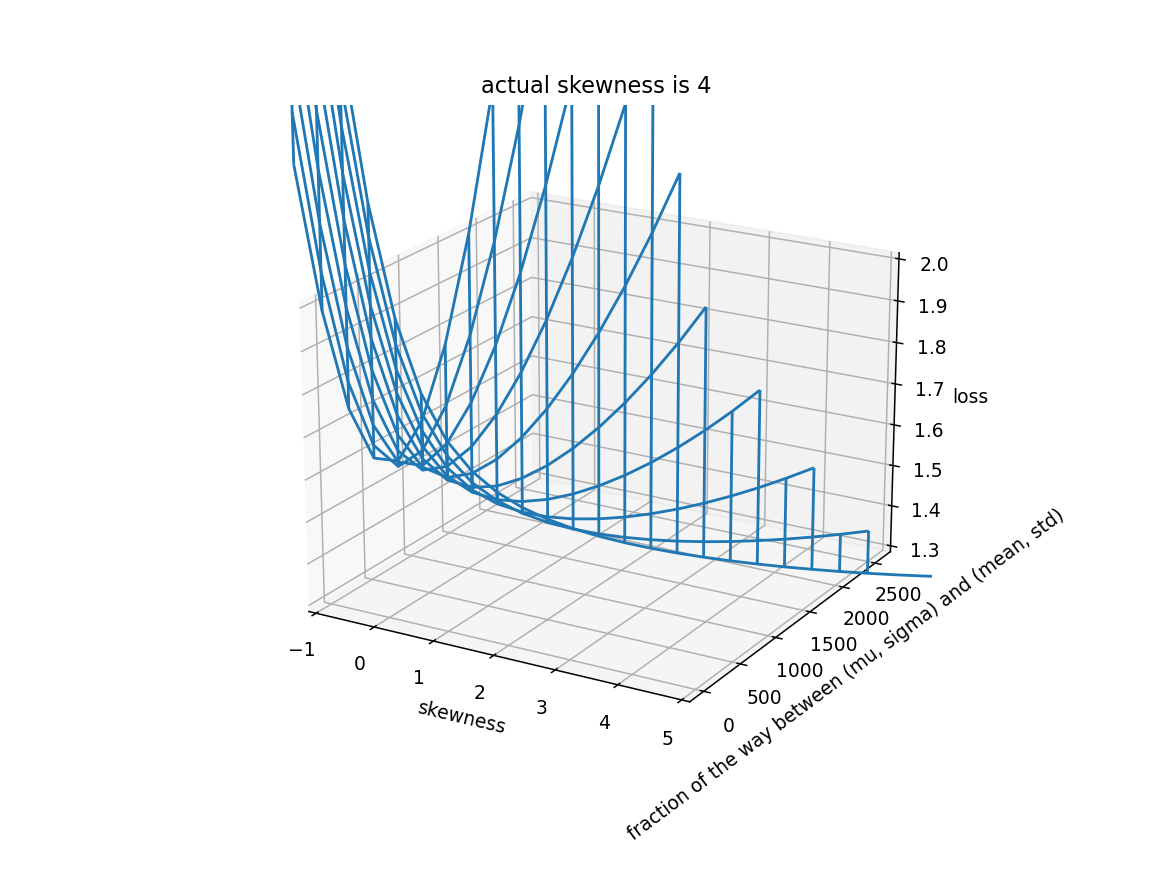

Text(0.5, 0.92, 'actual skewness is 4')

In [213]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, loss_tests)
ax.set_xlabel("skewness")
ax.set_ylabel("fraction of the way between (mu, sigma) and (mean, std)")
ax.set_zlabel("loss")
ax.set_zlim([1.3, 2])
ax.set_xlim(-1, 5)
plt.title("actual skewness is 4")

In [185]:
loss_test

[tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, dtype=torch.float64, grad_fn=<NegBackward>),
 tensor(inf, d

In [215]:
sum(x)/len(x)

tensor(-2.2318, dtype=torch.float64)

In [216]:
np.std(x.detach().numpy())

0.6289909535756614